# Описание проекта

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и заказчик планирует кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

***Цель исследования:*** <br /> выявить закономерности, определяющие успешность игры.

***Содержание***<br />
1. Предобработка данных
- Замена названий столбцов
- Проверка типов данных
- Обработка пропусков
- Обработка дубликатов
- Добавление необходимых столбцов

2. Исследовательский анализ
- Определение актуального периода
- Определение средней длительности жизненного цикла платформ
- Определение несколько потенциально прибыльных платформ
- Определение степень влияния оценок пользователей и критиков на объемы продаж
- Определение топ 5 популярный жанров игр.

3. Описание портрета пользователя
- Определение популярных платформ
- Определение популярных жанров игр
- Определение влияния возрастной категории на продажи

4. Статистический анализа
- Проверка гипотезы о равестве средних пользовательских рейтингов платформ Xbox One и PC
- Проверка гипотезы о равестве средних пользовательских рейтингов жанров Action и Sports

5. Общий вывод

***Описание данных***<br />
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board).

## 1. Ознакомление с данными

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np

In [2]:
try:
    df = pd.read_csv('games.csv')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')  

In [3]:
df.head(2)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Таким образом,** данные представляют собой параметры компьютерных игр: название, вендор, год выпуска, жанр, количество проданных экзепляров в Европе, Северной Америки, Японии и другие страны, а также оценки пользователей и критиков (Всего 11 колонок).
Всего представлено 16715 наименований игр.

## 2. Предобработка данных

### 2.1 Названия столбцов
Приведем к нижнему регистру всех столбцов

In [5]:
df.columns = df.columns.str.lower()

### 2.2 Типы данных
Приведем данные столбца year_of_release к формату даты, user_score к вещественному типу, после того, как избавимся с пропущенными значениями

In [6]:
df['year_of_release'] = pd.to_datetime(df['year_of_release'], format='%Y')

### 2.3 Пропущенные значения

**2.3.1 Проверим наличие пропусков:**

In [7]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [8]:
# Код ревьюера
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [9]:
df.isna().mean()

name               0.000120
platform           0.000000
year_of_release    0.016093
genre              0.000120
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513192
user_score         0.400897
rating             0.404786
dtype: float64

Большая часть пропущенных значений в переменных critic_score, user_score и rating. Возможные причины пропущенных значений:
1. Не было обязательным присвивать рейтинг и оценку играм
2. Потеря данных при выгрузке или передаче

**2.3.2 Обработаем пропущенные значения:**

*Переменные name, genre и year_of_release*<br />

0,00012% - 0.016% пропусков - это очень мало, можно удалить, это не повлияет на результат исследования.

In [10]:
df = df.dropna(subset=['name','year_of_release'])
df.isna().mean()

name               0.000000
platform           0.000000
year_of_release    0.000000
genre              0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.514534
user_score         0.401666
rating             0.405984
dtype: float64

*Переменные critic_score, user_score, rating*

В этих переменных очень большое кличество пропусков.
Замена на среднюю, медиану и 0 повлияют на результат исследования, удаление сильно сократит выборку. Поэтому лучше оставить пропущенные значения как есть.

**2.3.3 Проверим явные и неявные дубликаты**

*Переменная name* <br />

In [11]:
display(df['name'].nunique())
df['name'].duplicated().sum()

11426

5018

Обнаружено большое количество дубликатов по названию игры. Следует проверить наличие дубликатов по паре: "название - игровая платформа". Если такие есть- удалить

In [12]:
df.duplicated(subset=['name','platform']).sum()

3

In [13]:
df = df.drop_duplicates(subset=['name','platform'], keep='first').reset_index(drop=True)
df.duplicated(subset=['name','platform']).sum()

0

In [14]:
# Код ревьюера
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16441 entries, 0 to 16440
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16441 non-null  object        
 1   platform         16441 non-null  object        
 2   year_of_release  16441 non-null  datetime64[ns]
 3   genre            16441 non-null  object        
 4   na_sales         16441 non-null  float64       
 5   eu_sales         16441 non-null  float64       
 6   jp_sales         16441 non-null  float64       
 7   other_sales      16441 non-null  float64       
 8   critic_score     7980 non-null   float64       
 9   user_score       9836 non-null   object        
 10  rating           9765 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 1.4+ MB


*Переменная genre, platform, critic_score, user_score, rating*

In [15]:
display(df['genre'].sort_values().unique(),\
        df['platform'].sort_values().unique(),\
        df['critic_score'].sort_values().unique(),\
        df['user_score'].sort_values().unique(),\
        df['rating'].sort_values().unique())

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'], dtype=object)

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

array([13., 17., 19., 20., 21., 23., 24., 25., 26., 27., 28., 29., 30.,
       31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43.,
       44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56.,
       57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 69.,
       70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81., 82.,
       83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94., 95.,
       96., 97., 98., nan])

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan], dtype=object)

Обратим внимание на аббревиатуру 'tbd' в столбце с user_score.<br />
tbd - 'to be determined' - ставят (обычно в анонсах) разработчики игр, когда уже продукт готовится к выходу, но еще не определено когда именно. <br />
Поэтому логично заменить это значение на NaN. <br />После поменяем тип данных в user_score на вещественный тип данных.

In [16]:
df['user_score'] = df['user_score'].replace('tbd', np.nan).astype('float64')

Теперь обратим внимание на значения rating:<br />
'E'(«Everyone»)  - «Для всех»: Содержание вполне подходит для всех возрастов;<br />
'E10+' («Everyone 10 and older») — «Для всех от 10 лет и старше»;<br />
'EC'(«Early childhood») - «Для детей младшего возраста», игра подходит для детей от 3 лет;<br />
'K-A' ("Kids to Adults") - Первоначальная версия категории "E";<br />
'M'(«Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет;<br />
'RP' («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет;<br />
'T'(«Teen») — «Подросткам»: Игра подходит для лиц от 13 лет.

Таким образом, мы можем заменить категорию "К-А" на ее современную версию "E". Игры без рейтинга присвоим значение "without rating"

In [17]:
df['rating'] = df['rating'].replace('K-A', 'E')
df['rating'] = df['rating'].fillna('not rating')
df['rating'].sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'M', 'RP', 'T', 'not rating'],
      dtype=object)

### 2.4 Дополнительные столбцы
Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [18]:
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis = 1)

In [19]:
df.head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,NaN,NaN,not rating,40.24


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16441 entries, 0 to 16440
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16441 non-null  object        
 1   platform         16441 non-null  object        
 2   year_of_release  16441 non-null  datetime64[ns]
 3   genre            16441 non-null  object        
 4   na_sales         16441 non-null  float64       
 5   eu_sales         16441 non-null  float64       
 6   jp_sales         16441 non-null  float64       
 7   other_sales      16441 non-null  float64       
 8   critic_score     7980 non-null   float64       
 9   user_score       7460 non-null   float64       
 10  rating           16441 non-null  object        
 11  total_sales      16441 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(4)
memory usage: 1.5+ MB


В результате предобработки данных:
- привели к нижнему регистру названия столбцов
- проверили пропущенные значения и обработали, где это возможно
- проверили типы данных и изменили, где необходимо
- проверили дубликаты
- дополнили данные необходимым столбцом, который потребуется для исследования.

## 2. Исследовательский анализ данных

### 2.1 Анализ количества выпущенных игр по годам

<AxesSubplot:title={'center':'Количество выпущенных игр в течение лет'}, xlabel='Год выпуска', ylabel='Количество выпущенных игр'>

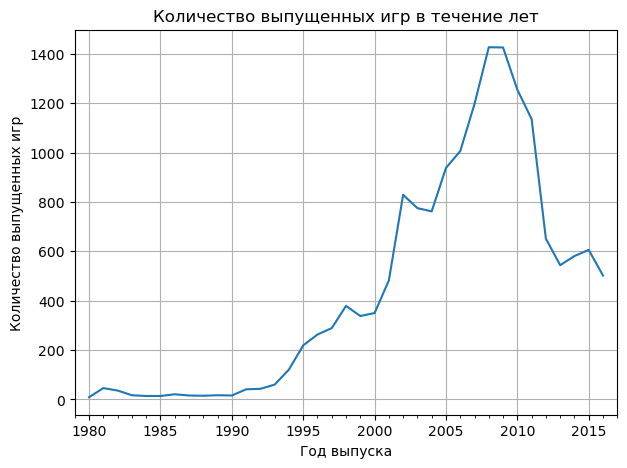

In [21]:
df.groupby('year_of_release')['name'].count().plot(title='Количество выпущенных игр в течение лет',\
                                                   ylabel='Количество выпущенных игр',\
                                                   xlabel='Год выпуска',\
                                                   figsize = (7,5),\
                                                   xlim=('1979','2017'),\
                                                  grid=True)

Как видим, в 1993 году положительный тренд, темп роста которого вырос в 2000г, а затем в 2003г до 2008 года. В 2008 году наблюдается резкий спад все индустрии, и только в 2014 новый рост.<br />
Таким образом, актуальным периодом для дальнейших рассчетов можно считать срез данных от 2014 года:

In [22]:
df_new = df.query('year_of_release >= "2014"')

### 2.2 Анализ данных по продажам платформ

<AxesSubplot:title={'center':'Объем продаж платформ за период 2014 - 2016гг.'}, xlabel='Платформы', ylabel='Продажи в млн ед копий'>

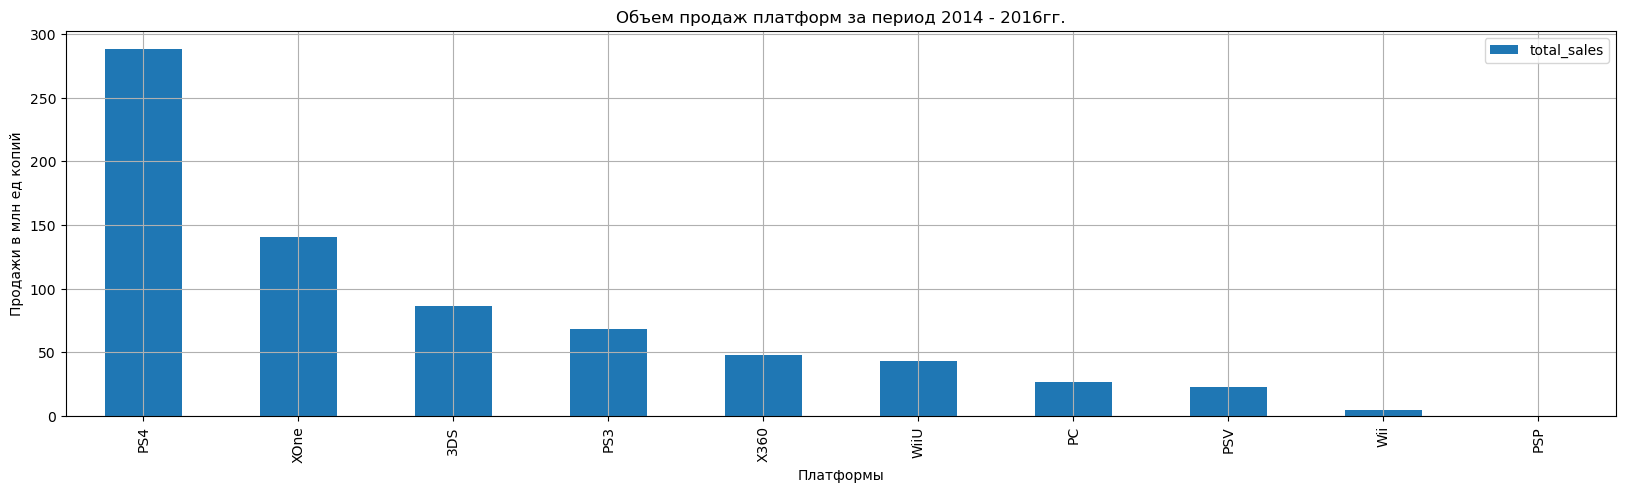

In [23]:
df_new.groupby('platform').agg(total_sales=('total_sales','sum'))\
.sort_values('total_sales', ascending=False).plot(kind='bar',\
                                                  title='Объем продаж платформ за период 2014 - 2016гг.',\
                                                  grid=True,\
                                                  ylabel='Продажи в млн ед копий',\
                                                  xlabel='Платформы',
                                                 figsize=(20,5))

На графике можно выделить абсолютного лидера относительно объема продаж - платформа PS4. А так же аутсайдера - PSP.

Рассмотрим как менялись продажи на самых прибыльных платформах в течение 2 лет:

In [24]:
top10=df_new.groupby('platform').agg(median_sales=('total_sales','median'), sum_sales=('total_sales','sum'))\
.sort_values('median_sales', ascending=False).reset_index(drop=False).head(10)
top10

,platform,median_sales,sum_sales
0,XOne,0.205,140.36
1,WiiU,0.190,42.98
2,PS4,0.185,288.15
3,Wii,0.180,5.07
4,X360,0.180,48.22
5,PS3,0.110,68.18
6,3DS,0.090,86.68
7,PC,0.060,27.05
8,PSV,0.040,22.40
9,PSP,0.020,0.36


Ориентируемся на медианное значение, поскольку платформы выпускали разные по популярности игры.

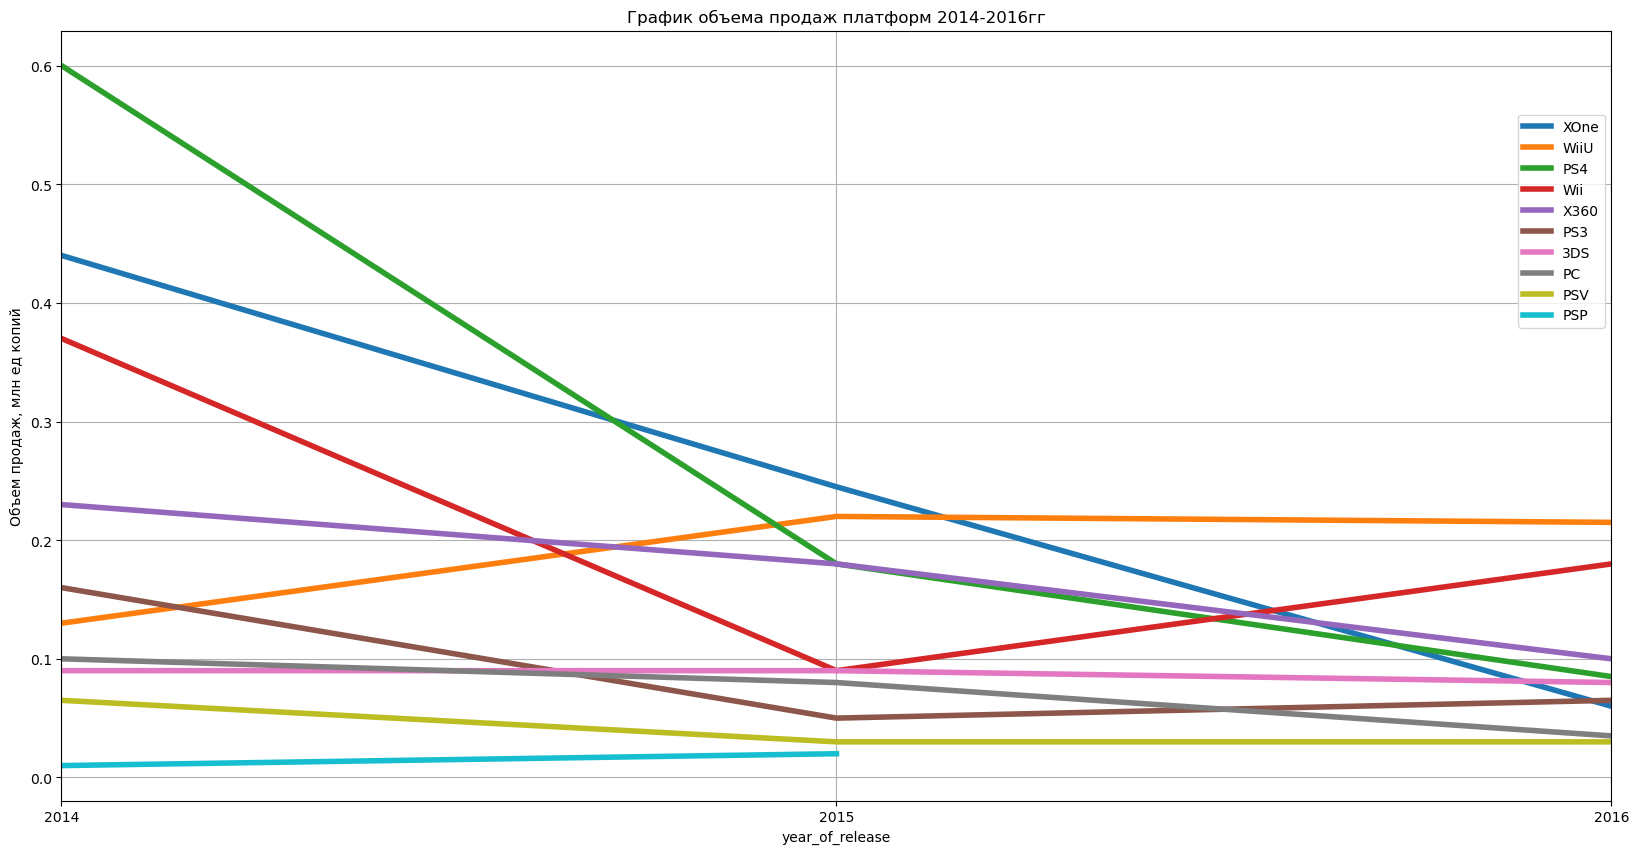

In [25]:
for i in top10['platform']:
    df_new.query('platform == @i').groupby('year_of_release')['total_sales'].median()\
    .plot(label=f'{i}',\
          grid=True,\
          figsize=(20,10),\
          title='График объема продаж платформ 2014-2016гг',
         xlim=('2014','2016'),\
         linewidth = 4)
    plt.legend(bbox_to_anchor=(1, 0.9))
    #plt.xlabel(f'Платформа {i}')
    plt.ylabel('Объем продаж, млн ед копий')

In [26]:
life_cycle_platform = df.pivot_table(index='platform', values='year_of_release', aggfunc=('min','max'))
life_cycle_platform['age'] = ((life_cycle_platform['max']-life_cycle_platform['min'])/np.timedelta64 ( 1 , 'Y'))
life_cycle_platform['median_sales'] = df.groupby('platform').agg(median_sales=('total_sales','median'))['median_sales']
life_cycle_platform.query('max==2016').sort_values('median_sales', ascending=False).reset_index(drop=False)

,platform,max,min,age,median_sales
0,X360,2016-01-01,2005-01-01,10.998172,0.28
1,PS3,2016-01-01,2006-01-01,9.998836,0.28
2,WiiU,2016-01-01,2012-01-01,4.000082,0.22
3,XOne,2016-01-01,2013-01-01,2.998008,0.22
4,PS4,2016-01-01,2013-01-01,2.998008,0.20
5,Wii,2016-01-01,2006-01-01,9.998836,0.19
6,3DS,2016-01-01,2011-01-01,4.999418,0.12
7,PC,2016-01-01,1985-01-01,30.998583,0.05
8,PSV,2016-01-01,2011-01-01,4.999418,0.05


In [27]:
life_cycle_platform['age'].median()

6.001492159318809

Если мы обратимся к необрезанным данным, то увидим, что в среднем цикл жизни платформ составляет около 6 лет.

Каждый продукт проживают стандартный жизненный цикл: внедрение, развитие, зрелость, спад. Из графика следует, что после 2015 года актуальные платформы находятся либо в состоянии спада, либо умеренного роста (PS3, Wii, Wiiu). Для построения прогноза на 2017 год данные раньше 2014 года не нужны. Так же следует избавиться от платформ, полностью потерявших свою актуальность к 2016 году.

In [28]:
forecast_df = df_new.query('platform == ["XOne","WiiU", "X360", "PS3", "PS4","Wii", "3DS", "PC", "PSV"]')

Text(0.5, 1.0, 'Диаграмма рассеивания объема продаж платформ за 2014-2016гг')

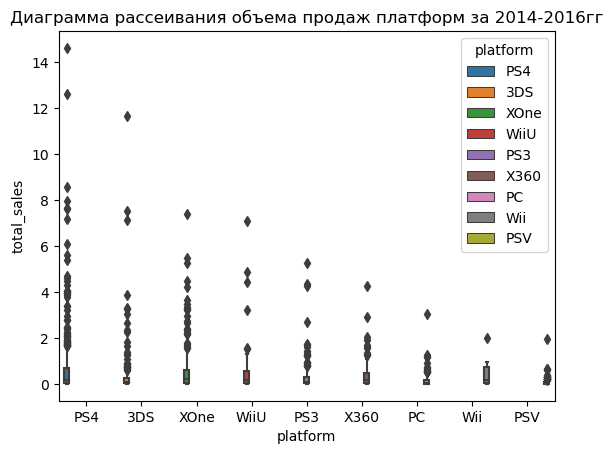

In [29]:
sns.boxplot(data=forecast_df, x='platform', y='total_sales', hue='platform')\
.set_title('Диаграмма рассеивания объема продаж платформ за 2014-2016гг')

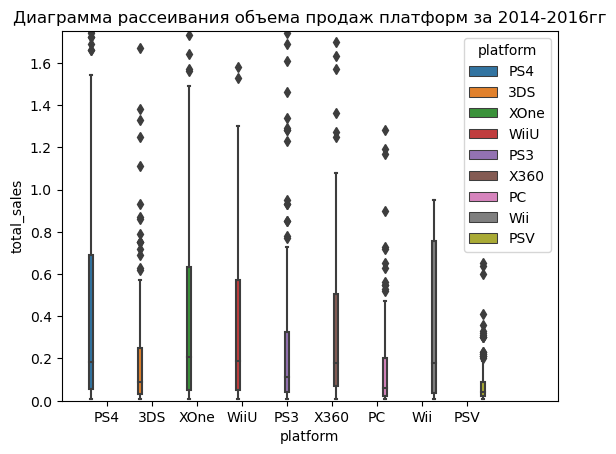

In [30]:
sns.boxplot(data=forecast_df, x='platform', y='total_sales', hue='platform')\
.set(ylim=(0,1.75), xlim=(-1,10), title='Диаграмма рассеивания объема продаж платформ за 2014-2016гг')
plt.figsize=(100, 30) #я пытаюсь размер увеличить, чтобы все уместились, но не выходит

Несмотря на большую разницу между разбросами значений объемов продаж, медианное значение у всех находится в границе 0,5 млн копий.
Самая продаваемая игра была у PS3 (более 20 млн копий). <br />
Топ-5 самых продаваемых платформ:
- XOne
- WiiU
- X360
- PS3
- PS4
<br />
Самая плохопродаваемая - PSV (менее 5 млн копий)

Оценим зависимость объема продаж у платформ от оценок критиков и пользователей:

PS4               critic_score  total_sales
critic_score      1.000000     0.402661
total_sales       0.402661     1.000000
3DS               critic_score  total_sales
critic_score      1.000000     0.314117
total_sales       0.314117     1.000000
XOne               critic_score  total_sales
critic_score      1.000000     0.428677
total_sales       0.428677     1.000000
WiiU               critic_score  total_sales
critic_score      1.000000     0.370201
total_sales       0.370201     1.000000
PS3               critic_score  total_sales
critic_score      1.000000     0.446575
total_sales       0.446575     1.000000
X360               critic_score  total_sales
critic_score      1.000000     0.525723
total_sales       0.525723     1.000000
PC               critic_score  total_sales
critic_score      1.000000     0.174634
total_sales       0.174634     1.000000
Wii               critic_score  total_sales
critic_score           NaN          NaN
total_sales            NaN          1.0
PSV   

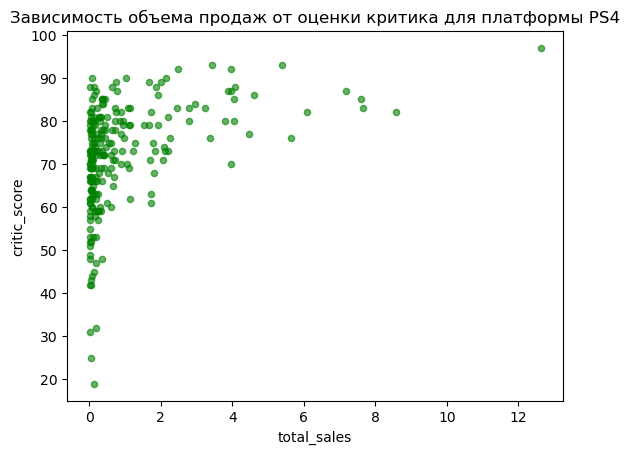

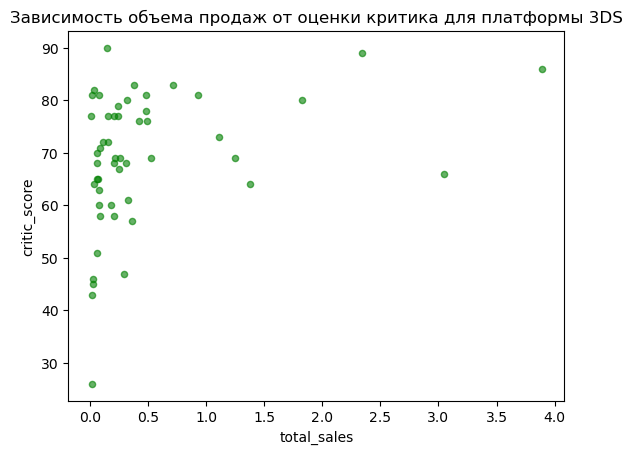

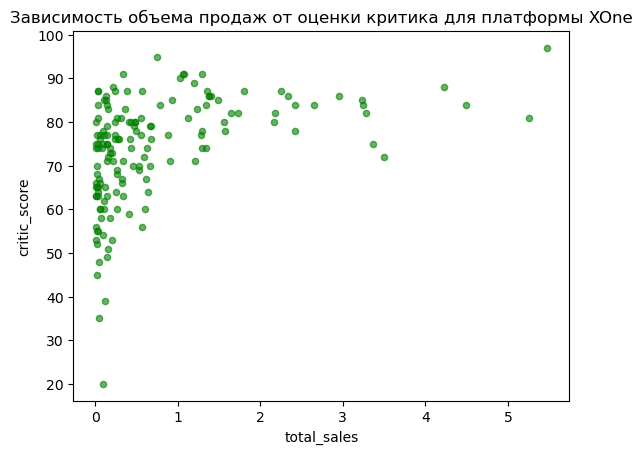

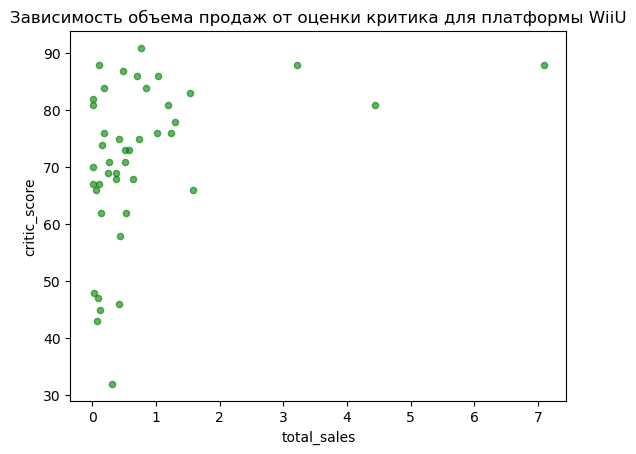

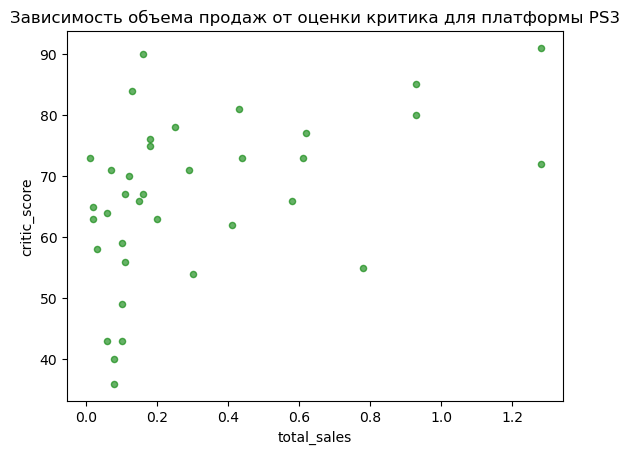

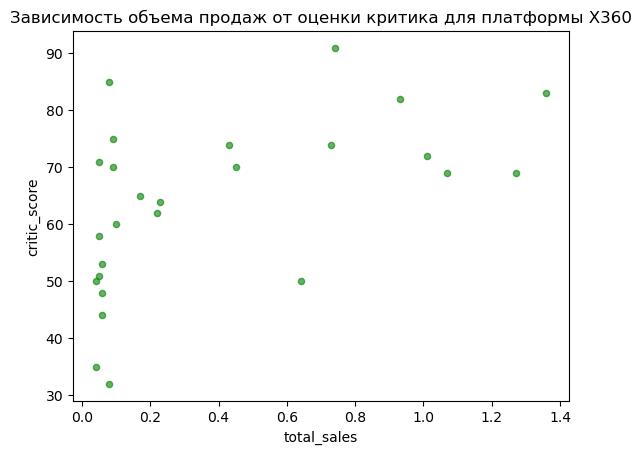

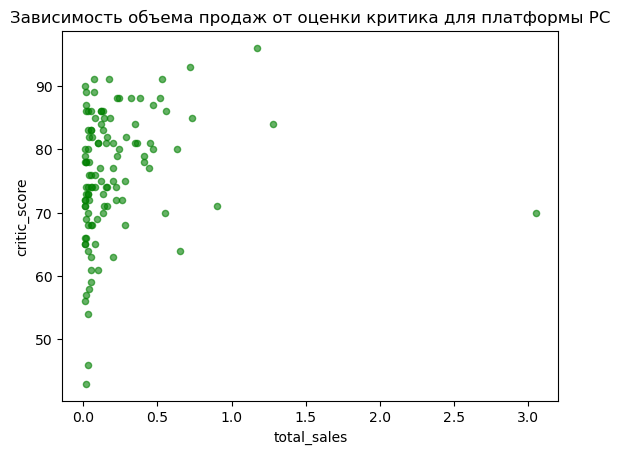

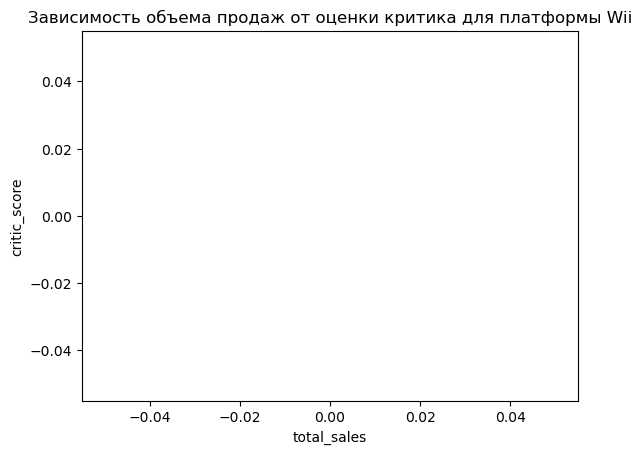

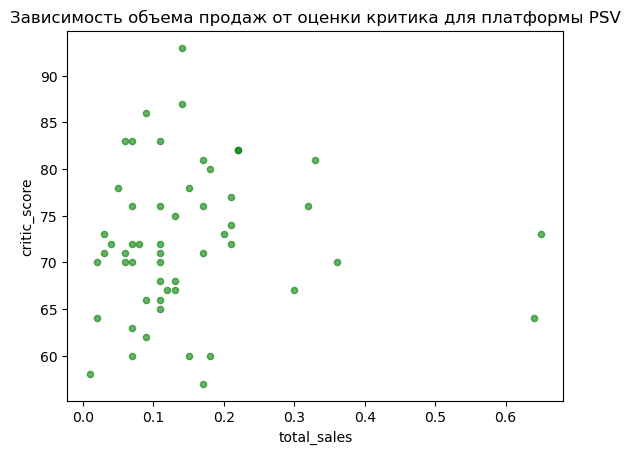

In [31]:
for i in forecast_df['platform'].unique():
    print(i, forecast_df.loc[forecast_df['platform']==i, ['critic_score', 'total_sales']].corr())
    forecast_df.loc[forecast_df['platform']==i, ['critic_score', 'total_sales']]\
    .plot(x='total_sales',\
          y='critic_score',\
          kind='scatter',\
          alpha=0.6,\
          color='green',
          title=f'Зависимость объема продаж от оценки критика для платформы {i}')

На продажи всех платформ критика влияет положительно: чем выше оценка, тем больше продажи.<br />
Из результатов следует, что PSV более устойчива к мнению критиков (коэф. корреляции 0,,042).<br />
На продажи платформ XOne оценка критиков оказывают самое большое влияние (коэф. корреляции 0,52)
На остальные платформы влияние умеренное (коэф. корреляции 0,3-0,4)

PS4              user_score  total_sales
user_score     1.000000    -0.040132
total_sales   -0.040132     1.000000
3DS              user_score  total_sales
user_score     1.000000     0.215193
total_sales    0.215193     1.000000
XOne              user_score  total_sales
user_score     1.000000    -0.070384
total_sales   -0.070384     1.000000
WiiU              user_score  total_sales
user_score     1.000000     0.407926
total_sales    0.407926     1.000000
PS3              user_score  total_sales
user_score     1.000000    -0.166761
total_sales   -0.166761     1.000000
X360              user_score  total_sales
user_score     1.000000    -0.138445
total_sales   -0.138445     1.000000
PC              user_score  total_sales
user_score     1.000000    -0.071597
total_sales   -0.071597     1.000000
Wii              user_score  total_sales
user_score          1.0          1.0
total_sales         1.0          1.0
PSV              user_score  total_sales
user_score     1.000000    -0.168455


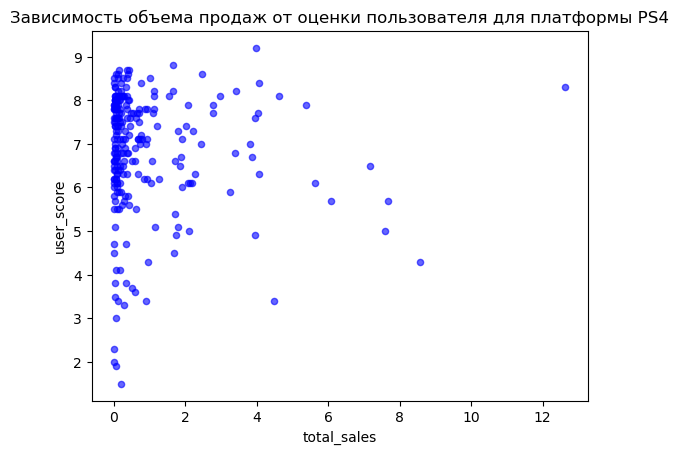

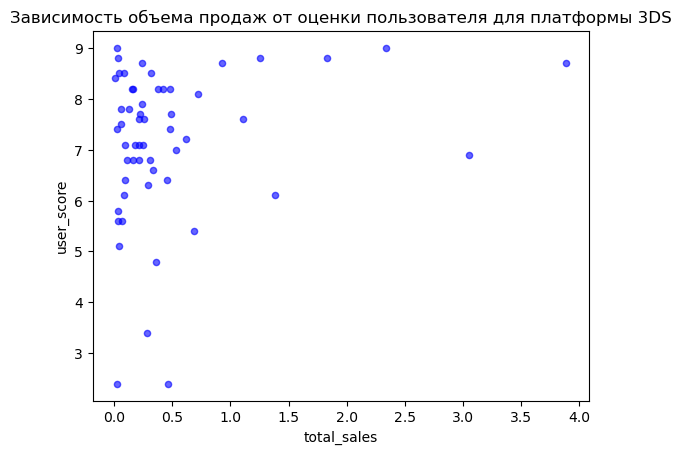

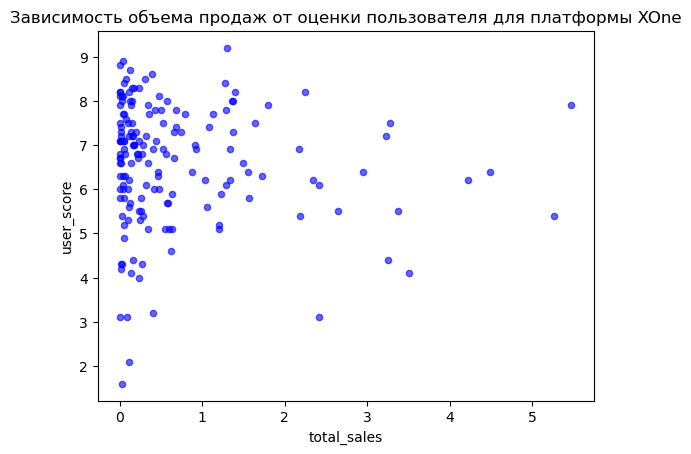

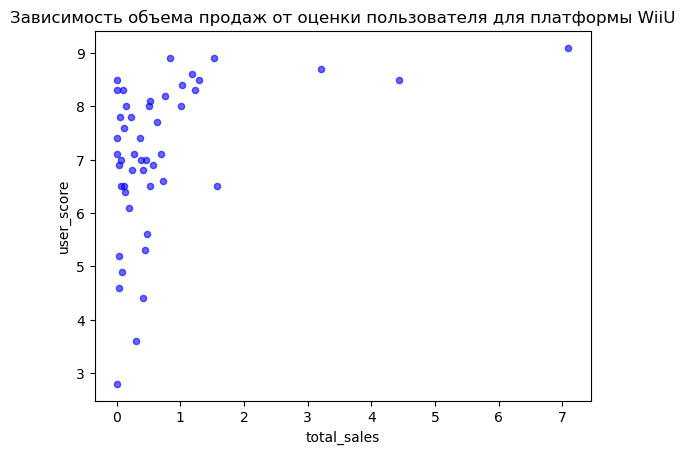

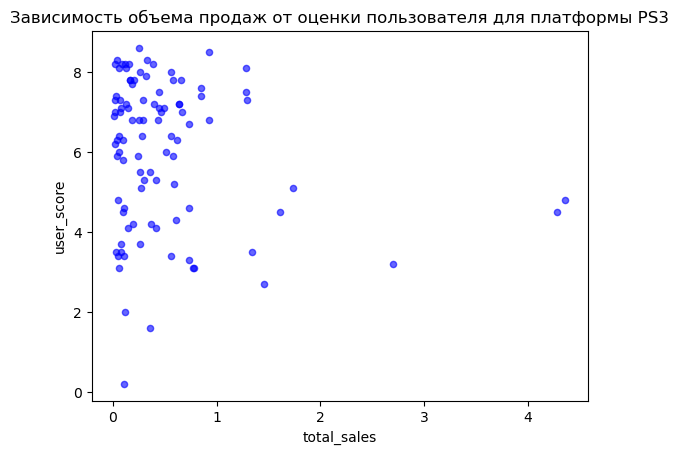

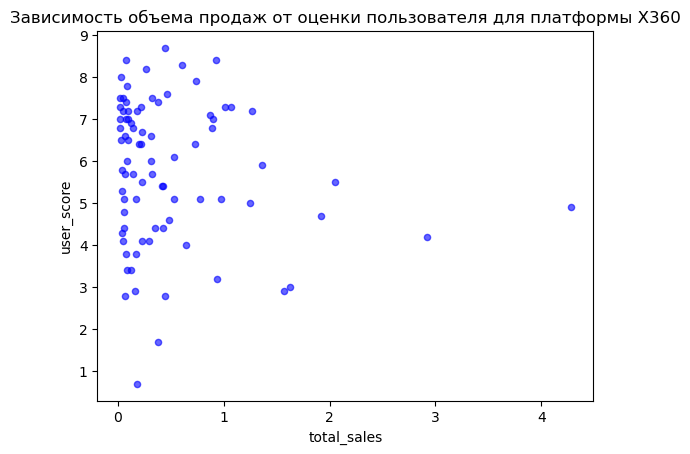

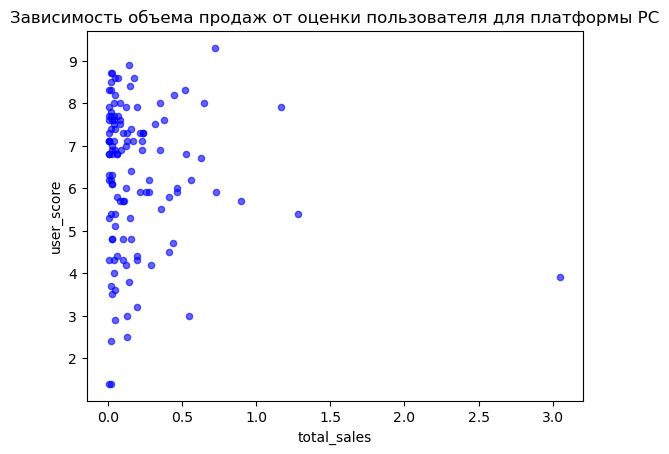

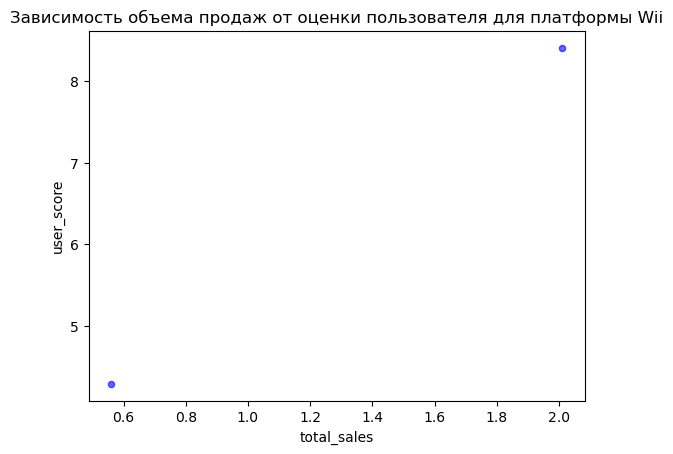

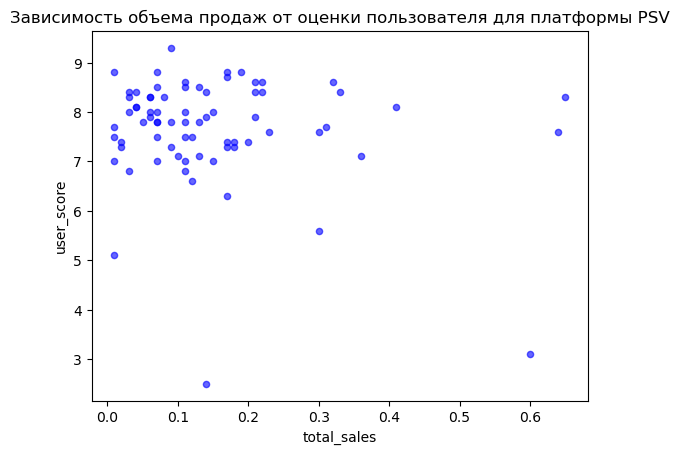

In [32]:
for i in forecast_df['platform'].unique():
    print(i, forecast_df.loc[forecast_df['platform']==i, ['user_score', 'total_sales']].corr())
    forecast_df.loc[forecast_df['platform']==i, ['user_score', 'total_sales']]\
    .plot(x='total_sales',\
          y='user_score',\
          kind='scatter',\
          alpha=0.6,\
          color='blue',\
          title=f'Зависимость объема продаж от оценки пользователя для платформы {i}')

Результаты можно разделить на две части:
1. на платформы PC, PS4, XOne, X360, PSV оценка пользователя влияет отрицательно и совсем незначительно. Можно говорить об отсутствии влияния.
2. самое ощутимое влияние оказывают оценки на Wii (коэф. корреляции 1), WiiU - умеренное влияние (коэф. корреляции 0,4), 3DS - ощутимая, но небольшая (коэф. корреляции 0,2).
Стоит отметить, что вся вторая группа платформ принадлежит копорации Нинтендо.

### 2.3 Анализ прибыльности жанров

Так же ориентируемся на медианное значение, поскольку платформы выпускали разные по популярности игры.

In [33]:
forecast_df.groupby('genre')['total_sales'].median().sort_values(ascending=False)

genre
Shooter         0.515
Sports          0.190
Platform        0.140
Fighting        0.125
Role-Playing    0.110
Simulation      0.100
Action          0.090
Misc            0.090
Racing          0.090
Strategy        0.060
Puzzle          0.045
Adventure       0.030
Name: total_sales, dtype: float64

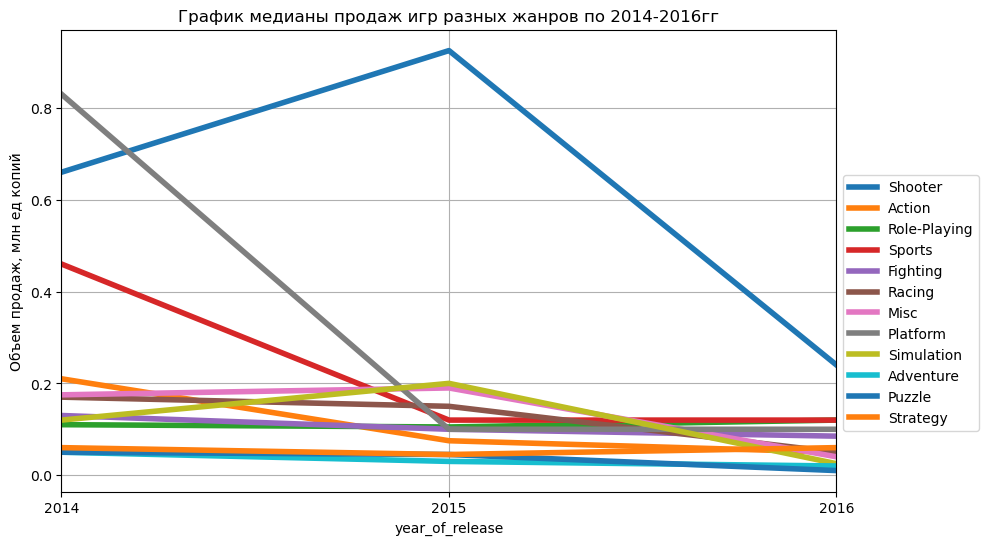

In [34]:
for i in forecast_df['genre'].unique():
    forecast_df.query('genre == @i').groupby('year_of_release')['total_sales'].median()\
    .plot(label=f'{i}',\
          grid=True,\
          figsize=(10,6),\
          title='График медианы продаж игр разных жанров по 2014-2016гг',
         xlim=('2014','2016'),\
         linewidth = 4)
    plt.legend(bbox_to_anchor=(1, 0.7))
    #plt.xlabel(f'Платформа {i}')
    plt.ylabel('Объем продаж, млн ед копий')

5 самых прибыльных жанров:
- Shooter
- Sports 
- Platform  
- Fighting  
- Role-Playing  

5 самых низкоприбыльных жанров:
- Misc        
- Racing   
- Strategy      
- Puzzle   
- Adventure   

## 3. Портрет пользователя каждого региона

### 3.1 Топ-5 популярных платформ

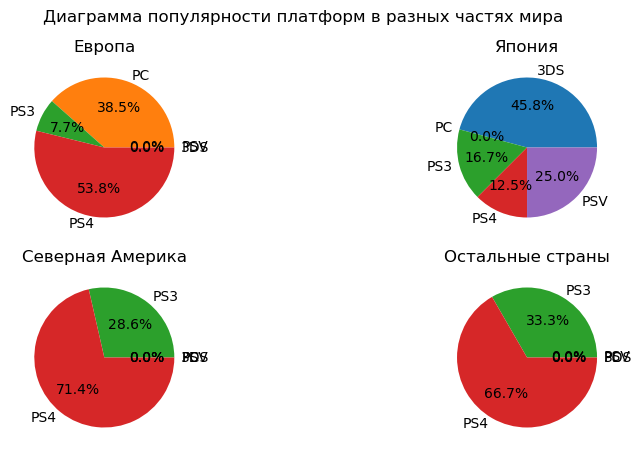

In [35]:
eu_sales= forecast_df.pivot_table(index='platform', values='eu_sales', aggfunc='median').reset_index().head(5)
jp_sales= forecast_df.pivot_table(index='platform', values='jp_sales', aggfunc='median').reset_index().head(5)
na_sales= forecast_df.pivot_table(index='platform', values='na_sales', aggfunc='median').reset_index().head(5)
other_sales= forecast_df.pivot_table(index='platform', values='other_sales', aggfunc='median').reset_index().head(5)

fig, ax=plt.subplots(2,2, figsize=(10,5))
ax[0,0].pie(data=eu_sales, x='eu_sales', labels='platform', autopct = '%.1f%%')
ax[0,0].set_title("Европа")
ax[0,1].pie(data=jp_sales, x='jp_sales', labels='platform', autopct = '%.1f%%')
ax[0,1].set_title("Япония")
ax[1,0].pie(data=na_sales, x='na_sales', labels='platform', autopct = '%.1f%%')
ax[1,0].set_title("Северная Америка")
ax[1,1].pie(data=other_sales, x='other_sales', labels='platform', autopct = '%.1f%%')
ax[1,1].set_title("Остальные страны")
fig.suptitle('Диаграмма популярности платформ в разных частях мира')
plt.show()

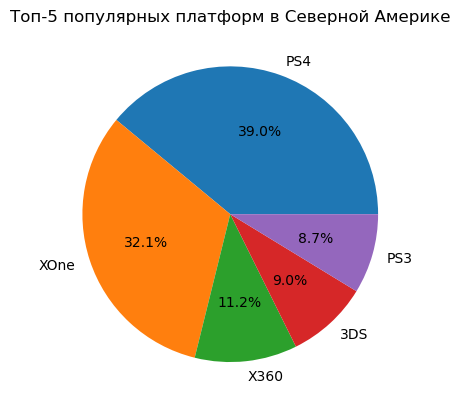

In [36]:
forecast_df.groupby('platform')['na_sales'].sum()\
    .sort_values(ascending = False)\
    .head()\
    .plot(kind = 'pie', autopct = '%.1f%%', title = 'Топ-5 популярных платформ в Северной Америке', ylabel = '')
plt.show()

Во всем мире, за исключением Японии, наиболее популярные платформы американской корпорации Microsoft: PS3 и PS4, где PS4 повсеместно является абсолютным лидером.<br />
В Японии же поддерживают своего производителя, 45% пользователей выбирают 3DS.

### 3.2 Топ-5 популярных жанров

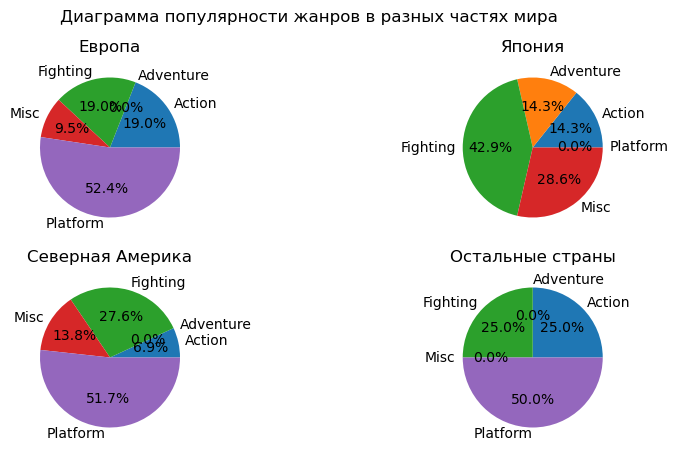

In [37]:
eu_genre= forecast_df.pivot_table(index='genre', values='eu_sales', aggfunc='median').reset_index().head(5)
jp_genre= forecast_df.pivot_table(index='genre', values='jp_sales', aggfunc='median').reset_index().head(5)
na_genre= forecast_df.pivot_table(index='genre', values='na_sales', aggfunc='median').reset_index().head(5)
other_genre= forecast_df.pivot_table(index='genre', values='other_sales', aggfunc='median').reset_index().head(5)

fig, ax=plt.subplots(2,2, figsize=(10,5))
ax[0,0].pie(data=eu_genre, x='eu_sales', labels='genre', autopct = '%.1f%%')
ax[0,0].set_title("Европа")
ax[0,1].pie(data=jp_genre, x='jp_sales', labels='genre', autopct = '%.1f%%')
ax[0,1].set_title("Япония")
ax[1,0].pie(data=na_genre, x='na_sales', labels='genre', autopct = '%.1f%%')
ax[1,0].set_title("Северная Америка")
ax[1,1].pie(data=other_genre, x='other_sales', labels='genre', autopct = '%.1f%%')
ax[1,1].set_title("Остальные страны")
fig.suptitle('Диаграмма популярности жанров в разных частях мира')
plt.show()

В Европе, Северной Америке и остальных странах самый популярный жанр - platform.<br />
В схожих пропорциях разместились жанры среди пользователей Европы и Америки.
В Японии самый популярный жанр - fighting. Еще Япония в отличие от всех, чаще играет в adventure<br />
В остальном вкусовые предпочтения схожи.

### 3.3 Рейтинг ESRB в каждом регионе

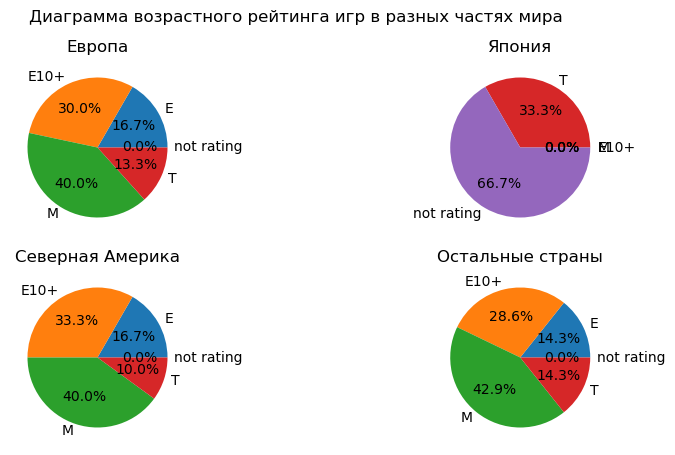

In [38]:
eu_rating= forecast_df.pivot_table(index='rating', values='eu_sales', aggfunc='median').reset_index().head(5)
jp_rating= forecast_df.pivot_table(index='rating', values='jp_sales', aggfunc='median').reset_index().head(5)
na_rating= forecast_df.pivot_table(index='rating', values='na_sales', aggfunc='median').reset_index().head(5)
other_rating= forecast_df.pivot_table(index='rating', values='other_sales', aggfunc='median').reset_index().head(5)

fig, ax=plt.subplots(2,2, figsize=(10,5))
ax[0,0].pie(data=eu_rating, x='eu_sales', labels='rating', autopct = '%.1f%%')
ax[0,0].set_title("Европа")
ax[0,1].pie(data=jp_rating, x='jp_sales', labels='rating', autopct = '%.1f%%')
ax[0,1].set_title("Япония")
ax[1,0].pie(data=na_rating, x='na_sales', labels='rating', autopct = '%.1f%%')
ax[1,0].set_title("Северная Америка")
ax[1,1].pie(data=other_rating, x='other_sales', labels='rating', autopct = '%.1f%%')
ax[1,1].set_title("Остальные страны")
fig.suptitle('Диаграмма возрастного рейтинга игр в разных частях мира')
plt.show()

В Европе, Северной Америке и остальных странах (кроме Японии) доли рынка распределены примерно одинаково:
- самую большую часть занимают игры с возрастным цензом 17+ "Для взрослых" - 40%. (Возможно, это связано с популярным во всех регионах жанром fighting, который подразумевает сцены насилия и проч.)
- около 30% игры для детей от 10 лет 
- 14-17% игры для любого возраста
- 10-14% игры для подростков <br />

В Японии почти 70% занимают игры без рейтинга. Остальные 30% - занимают игры для подростков. Можно предположить, что выпускать игры для младших пользователей не очень рентабельно в этом регионе.<br />

**Таким образом,** вырисовывается ЦА игр в каждом регионе, поэтому можно сказать, что возрастная категория влияет на продажи.

## 4. Гипотезы

### 4.1 Рейтинги платформ Xbox One и PC

In [39]:
xbox1_user_score = forecast_df.query('platform=="XOne"')['user_score'].dropna().reset_index(drop=True)
pc_user_score = forecast_df.query('platform=="PC"')['user_score'].dropna().reset_index(drop=True)
display(len(xbox1_user_score))
len(pc_user_score)

165

122

In [40]:
display(xbox1_user_score.median())
pc_user_score.median()

6.8

6.8

***Гипотезы:*** <br />
**H0:** Средние пользовательские рейтинги платформ Xbox One и PC равны. <br />
**H1:** Средний пользовательский рейтинг платформы Xbox One меньше PC. <br />

1. Мы сформулировали нулевую гипотезу со знаком равенства, поскольку медианные значения двух выборок не отличаются, и мы предполагаем, что нулевая гипотеза не будет отвергнута.
2. Мы сформулировали одностороннюю альтернативную гипотезу, поскольку уже знаем, что Xbox One на момент сбора данны существует всего 2 года, а PC- 16 лет. Можно предположить, что более "опытная" платформа уже отработала все пользовательские замечания. Поскольку гипотеза одностороняя, критическое значение попопал не делим.<br />

Уровень значимости 0.01<br />
equal_var=False из-за разницы в "возрасте" платформ.

In [41]:
alpha = .01

results = st.ttest_ind(xbox1_user_score, pc_user_score, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


**Вывод:**
Вероятность того, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, равна 11%.
Это не высокая вероятность, но данные гипотезе не противоречат, поэтому нам не следует отвергать нулевую гипотезу. 
Если мы посмотрим на медианные значения, то увидим, что вывод верный.

### 4.2 Рейтинги жанров Action и Sports

In [42]:
action_user_score = forecast_df.query('genre=="Action"')['user_score'].dropna().reset_index(drop=True)
sports_user_score = forecast_df.query('genre=="Sports"')['user_score'].dropna().reset_index(drop=True)
display(len(action_user_score))
len(sports_user_score)

297

127

In [43]:
display(action_user_score.median())
sports_user_score.median()

7.1

5.5

***Гипотезы:*** <br />
**H0:** Средние пользовательские рейтинги для жанров Action и Sports равны. <br />
**H1:** Средние пользовательские рейтинги для жанров Action и Sports не равны. <br />

1. Мы проверяем выборки на равество средних. 
2. Альтернативная гипотеза получилась двухсторонняя, поэтому p-value делим пополам.<br />

Уровень значимости 0.01<br />
equal_var=False из-за разницы в выборке.


In [44]:
alpha = .01

results = st.ttest_ind(action_user_score, sports_user_score, equal_var=False)

print('p-значение:', results.pvalue/2)

if results.pvalue/2 < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 5.912775191322278e-15
Отвергаем нулевую гипотезу


**Вывод:**
Вероятность того, что средние оценки пользовательского рейтинга жанров Action и Sports равны, ничтожно мала, поэтому нам следует отвергнуть нулевую гипотезу. Этот вывод подтвержает и медианы выборок.

## 5. Общий вывод

Целью данной работы было определение закономерностей, определяющие успешность игры, на данных 1980-2016гг.

Для проведения исследования была выполнено предобработка данных:
- обработка пропущенных значений;
- проверка типов данных;
- проверка дубликатов значений;
- добавлены дополнтельные столбцы. 
Отмечено большое количество пропусков в части оценок пользователей и критиков.

В части исследовательского анализа:
- определен актуальный период
- определена средняя длительность жизненного цикла платформ
- выбраны несколько потенциально прибыльных платформ
- определена степень влияния оценок пользователей и критиков на объемы продаж
- определен топ 5 популярный жанров игр.

В части описания портрета пользователя Европы, Серевной Америки, Японии и других стран:
- определены популярные платформы
- определены популярные жанры игр
- определен возраст ЦА

В части статистического анализа:
- определена веротность равества средних пользовательских рейтингов платформ Xbox One и PC
- определена веротность равества средних пользовательских рейтингов жанров Action и Sports